In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('------------------/heart.csv')
df = data.rename(columns={'trtbps':'rest_bps','thalachh':'thal',
                              'exng':'exang','caa':'ca','output':'mark'})

df1 = df.drop(labels=['slp','thall'], axis=1, inplace=False)
columns = df1.columns

In [ ]:
corr_Pearson = df1.corr(method='pearson')

figure = plt.figure(figsize=(12,8))
sns.heatmap(corr_Pearson,vmin=-1,vmax=+1,cmap='Blues',annot=True, 
            linewidths=1,linecolor = 'white')
plt.title('Pearson Correlation')
plt.show()

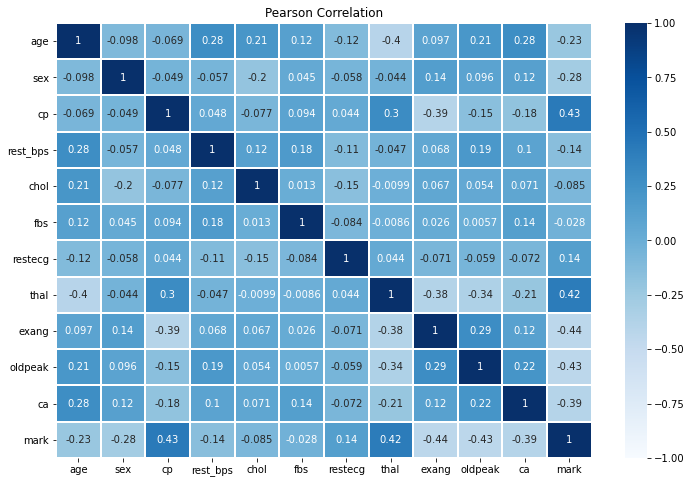

In [ ]:
df1.hist(figsize=(15,10))
plt.show()

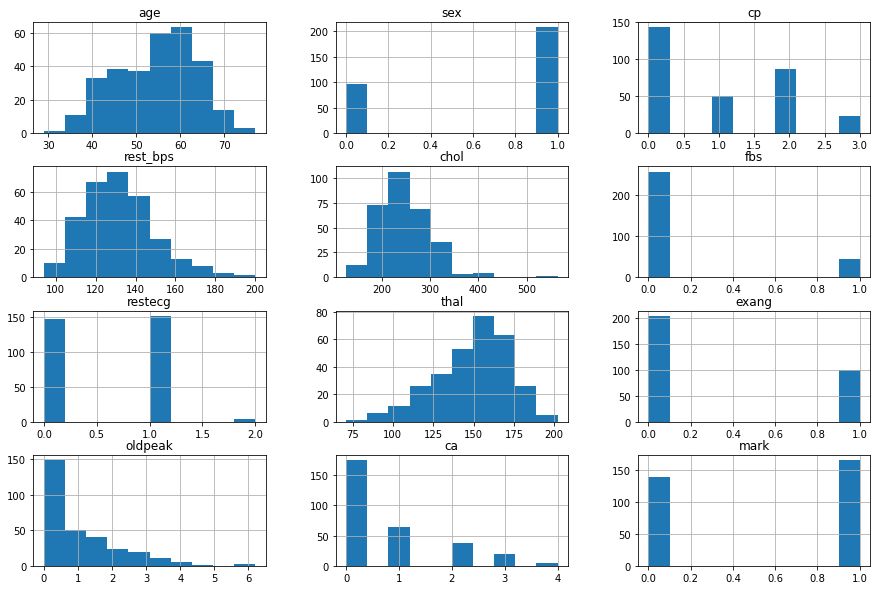

In [ ]:
j = 0
for i in columns:
    j = j+1
    if(j!=len(columns)):
        sns.lineplot(x='mark', y=i,data=df1)
        plt.show()

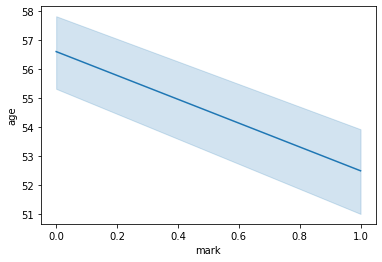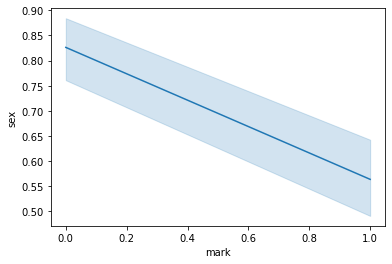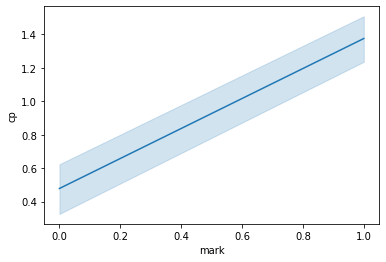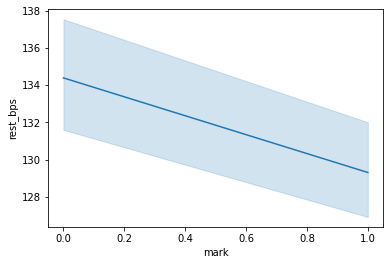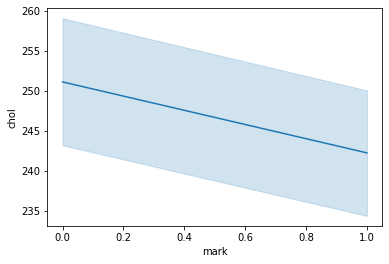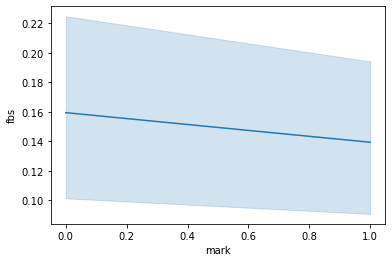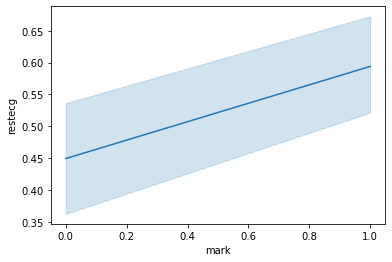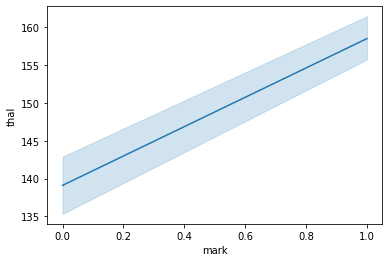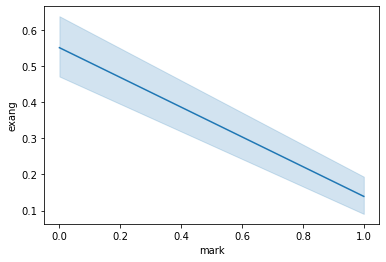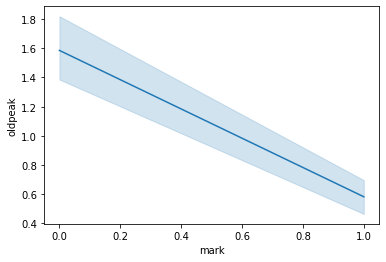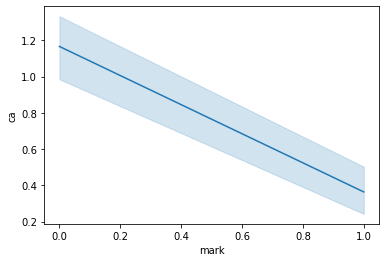

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.barplot(x='sex', y='mark',data=df1)
plt.show()

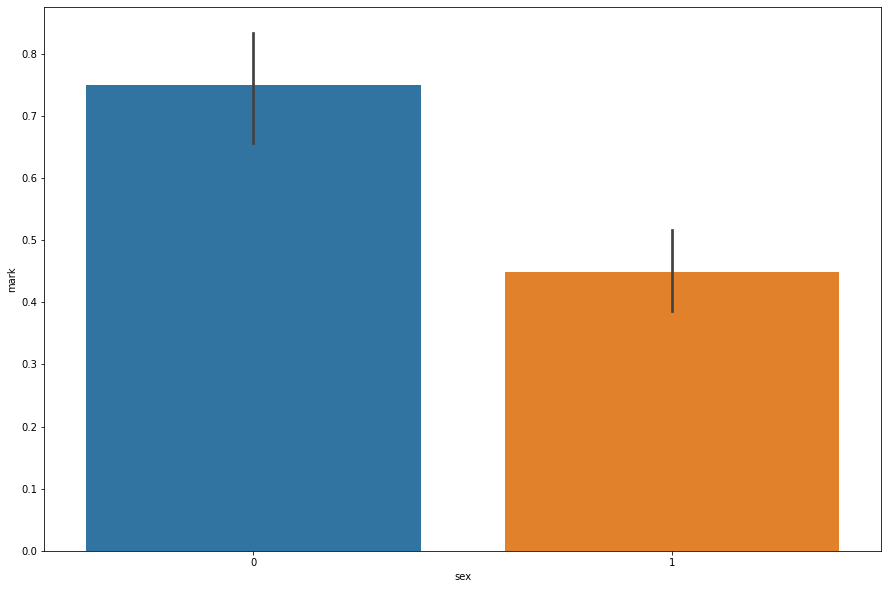

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.barplot(x='cp', y='mark',data=df1)
plt.show()

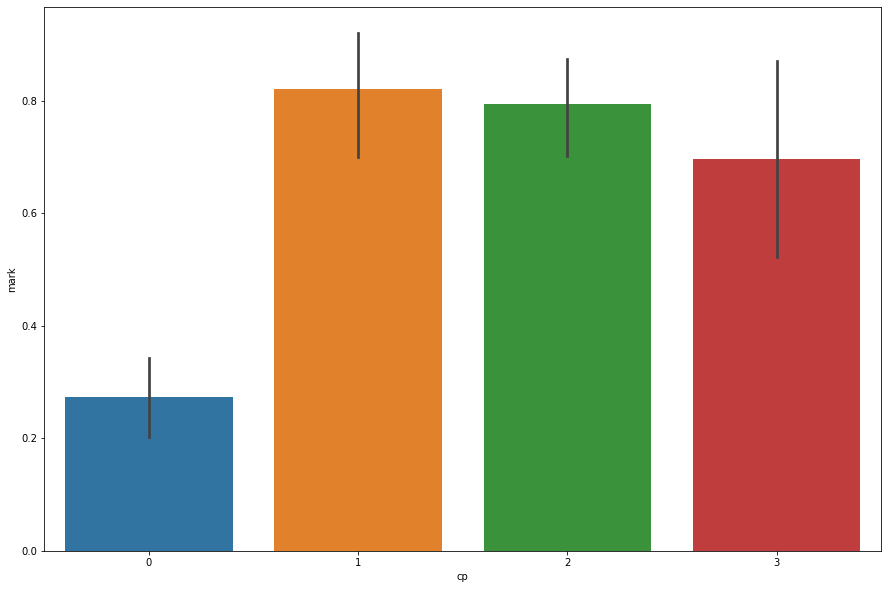

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.barplot(x='fbs', y='mark',data=df1)
plt.show()

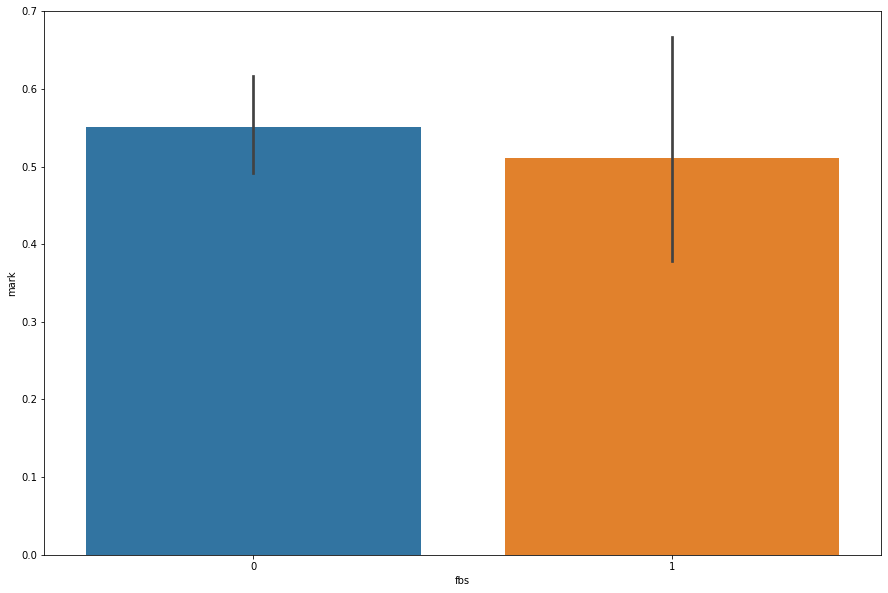

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.barplot(x='restecg', y='mark',data=df1)
plt.show()

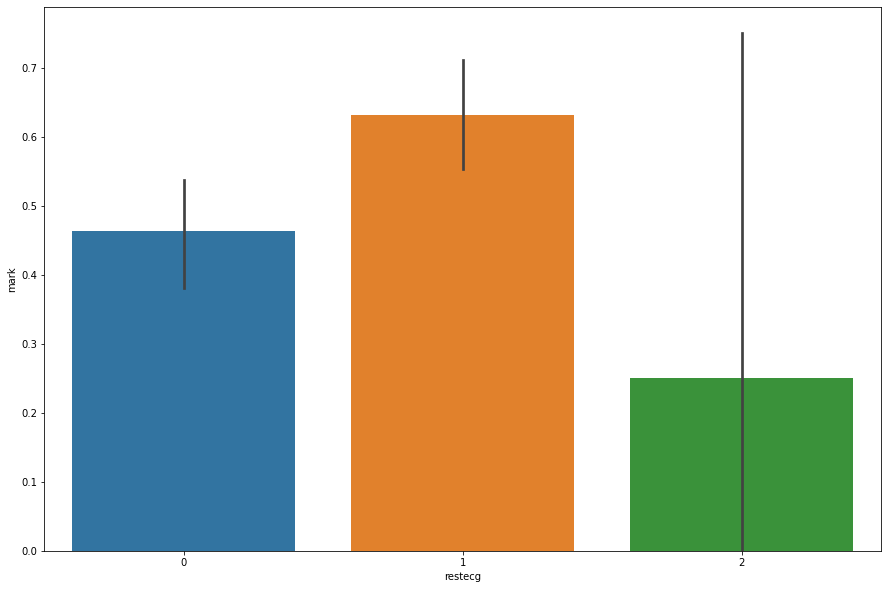

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.barplot(x='exang', y='mark',data=df1)
plt.show()

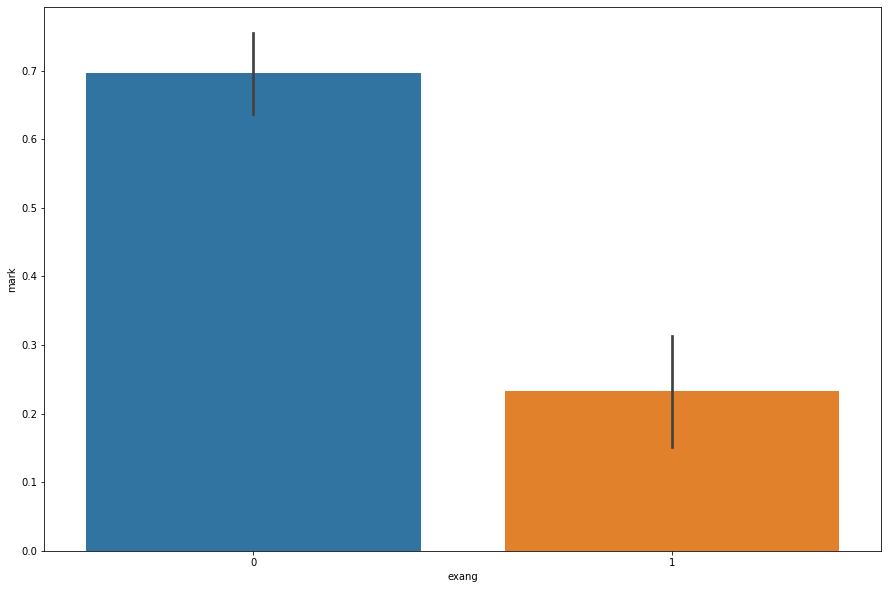

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.barplot(x='ca', y='mark',data=df1)
plt.show()

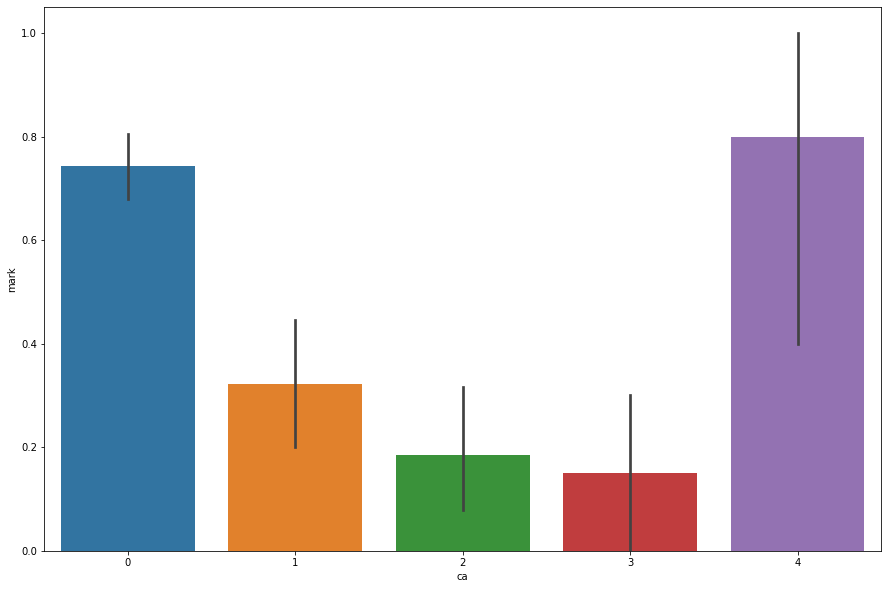

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.boxplot(x='chol',y='mark',orient='h',data=df1)
plt.show()

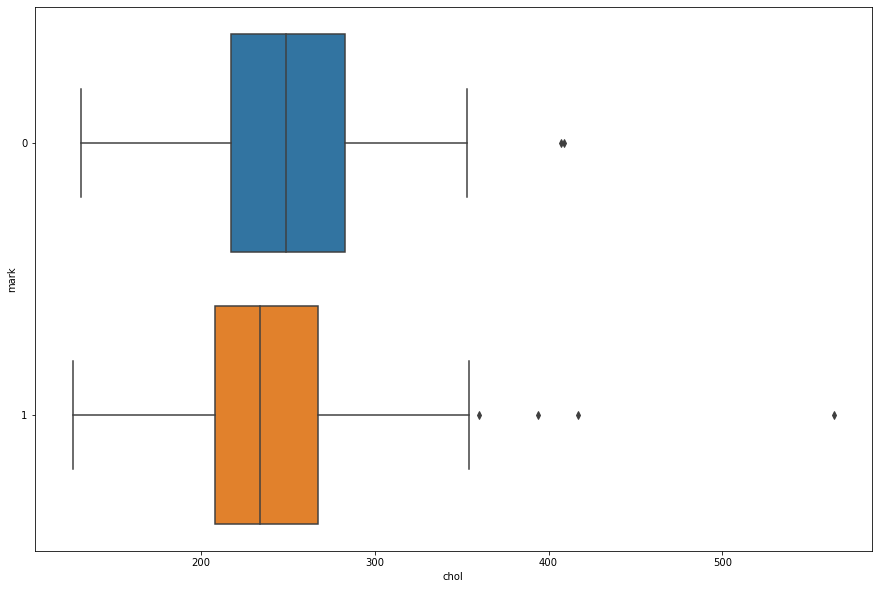

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.boxplot(x='rest_bps',y='mark',orient='h',data=df1)
plt.show()

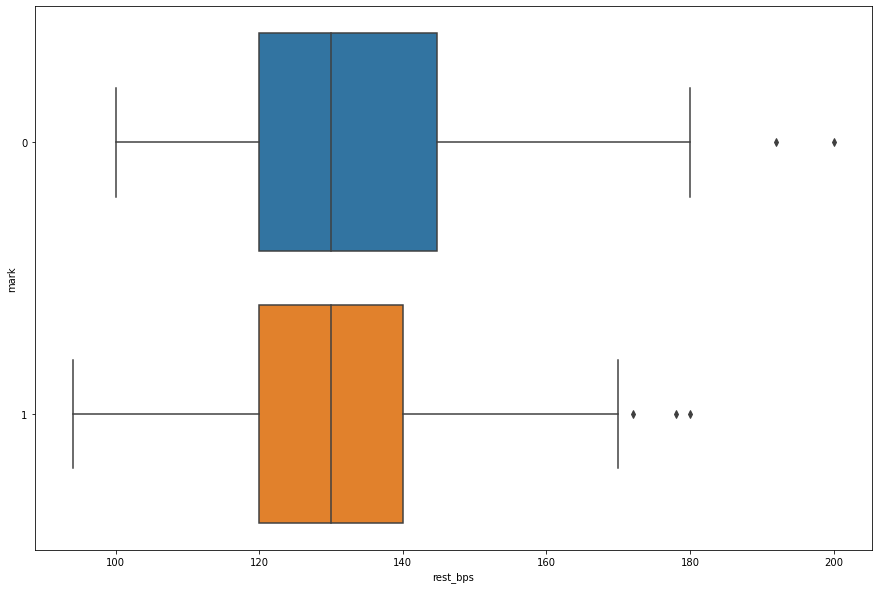

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.boxplot(x='thal',y='mark',orient='h',data=df1)
plt.show()

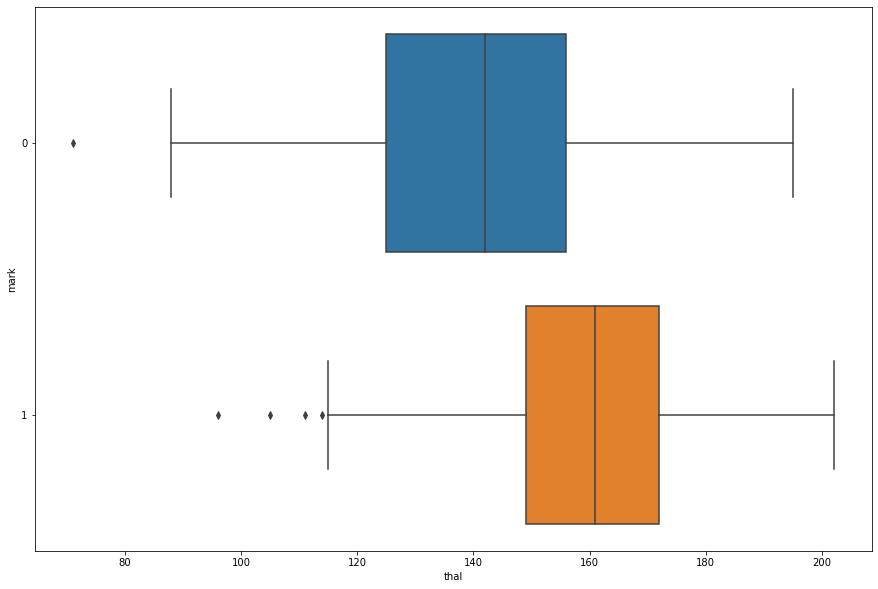

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.boxplot(x='oldpeak',y='mark',orient='h',data=df1)
plt.show()

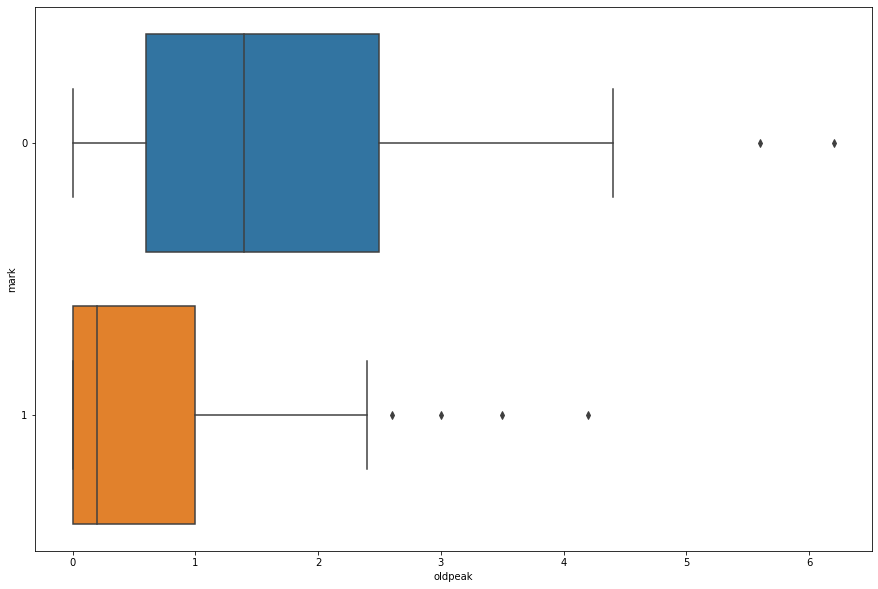

In [ ]:
data_x = df.drop(labels=['mark'], axis=1, inplace=False)
data_y = df['mark']


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y ,
                                    test_size = 0.3, random_state = 44, 
                                    shuffle = True)

In [ ]:
Logistic_R = LogisticRegression(solver="liblinear").fit(x_train,y_train)
KNN = KNeighborsClassifier().fit(x_train,y_train)
Decision_Tree = DecisionTreeClassifier(random_state=44).fit(x_train,
                                                            y_train)
models = [Logistic_R,KNN,Decision_Tree]

In [ ]:
model_total = pd.DataFrame(columns=['Score','Model'])
for model in models:
    pre = model.predict(x_test)
    cvs = cross_val_score(model,x_test,y_test).mean()
    
    cf_matrix = confusion_matrix(y_test,pre)
    figure = plt.figure(figsize=(15,10))
    sns.heatmap(cf_matrix, linecolor = "white", linewidth = 1, 
                cmap = "Blues", annot = True)
    plt.show()
    
    model_name = model.__class__.__name__ # tricky
    result = pd.DataFrame([[cvs,model_name]],columns=['Score','Model'])
    model_total = model_total.append(result)

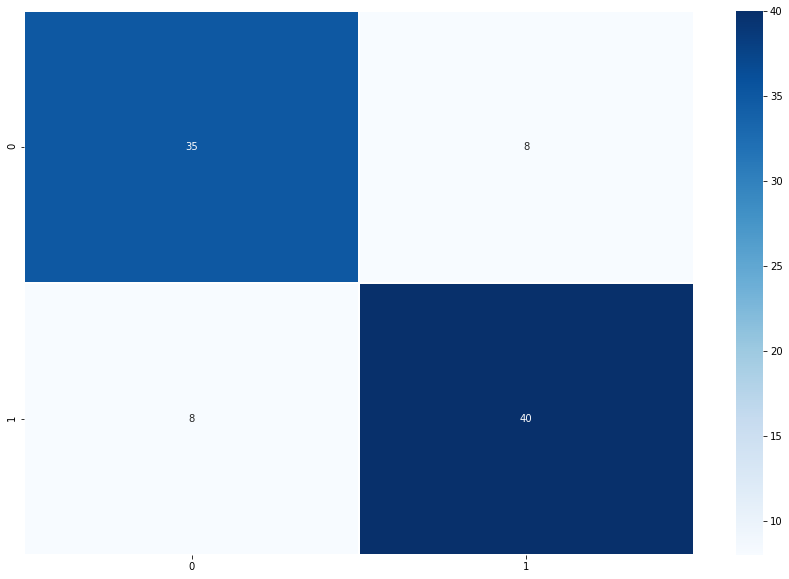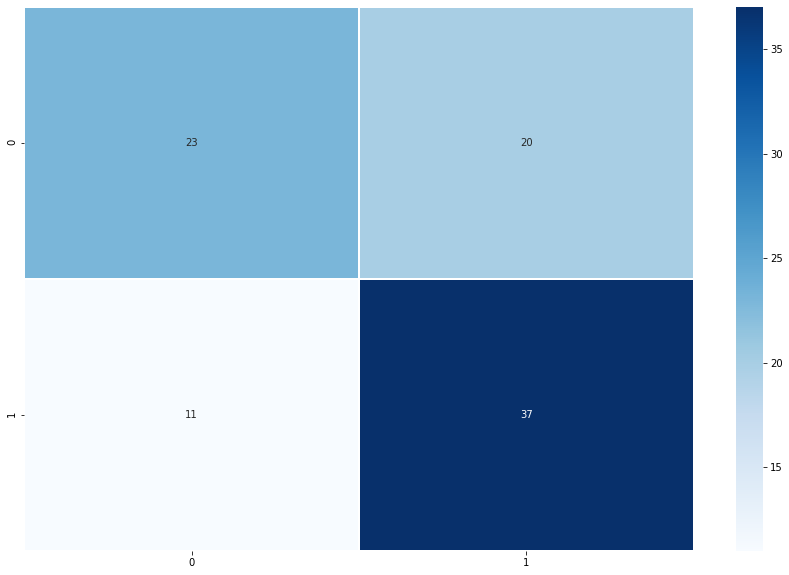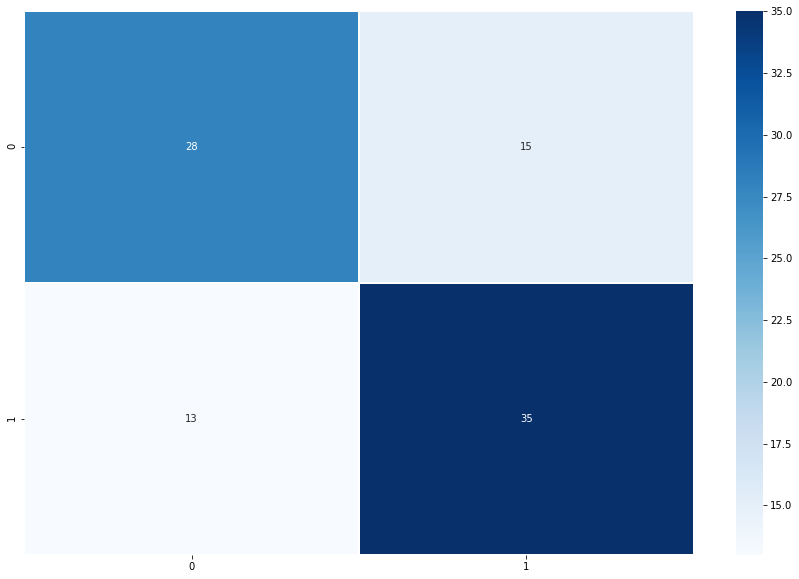

In [ ]:
figure = plt.figure(figsize=(15,10))   
sns.barplot(x="Model",y="Score",data=model_total)
plt.ylim(0,1)

best_model = model_total.sort_values(by=['Score'],ascending=False).iloc[0,1]

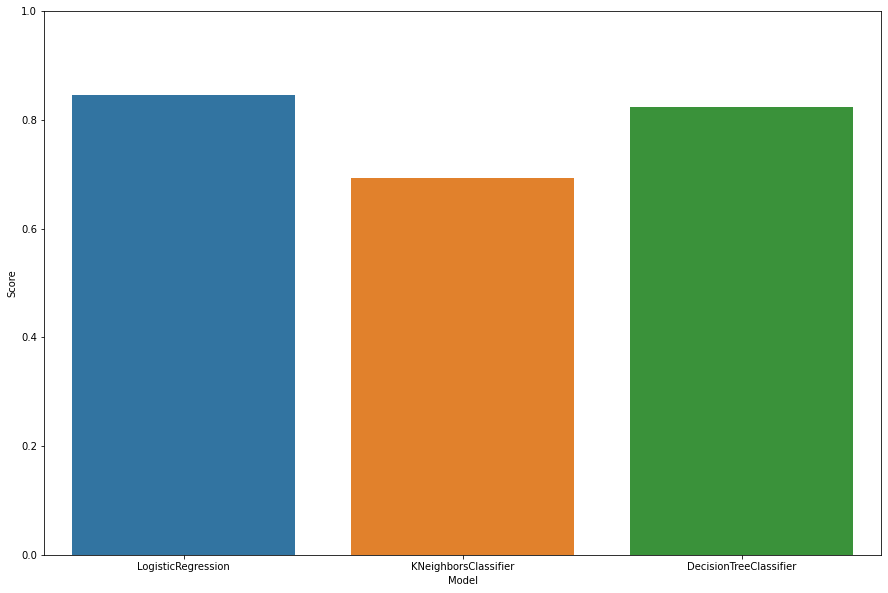